# 1.Data Exploration & Preprocessing Techniques

## 1.1 Import Necessary Libraries

In [3]:
# Basic data handling
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import warnings  # Suppress warnings

# Data visualization
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Statistical plots


# Statistical utilities
from scipy.stats import zscore  # Z-score for outlier detection

# Feature selection
from sklearn.feature_selection import VarianceThreshold  # Remove low-variance features

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Encoding & scaling
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder  # Categorical encoders
from sklearn.compose import ColumnTransformer  # Combine multiple preprocessors

# Train-test split
from sklearn.model_selection import train_test_split  # Split dataset

# Modeling
from sklearn.ensemble import RandomForestClassifier  # Tree-based classifier
from sklearn.linear_model import LogisticRegression  # Linear classifier

# Pipelines & resampling
from imblearn.pipeline import Pipeline  # Build ML pipelines with SMOTE
from imblearn.over_sampling import SMOTE  # Handle class imbalance

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV  # Tune model parameters

# Evaluation metrics & plots
from sklearn.metrics import accuracy_score  # Model accuracy
from sklearn.metrics import classification_report  # Precision, recall, f1-score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Confusion matrix
from sklearn.metrics import roc_auc_score  # AUC score
from sklearn.metrics import roc_curve, auc  # ROC curve

# Model explainability
import shap  # SHAP for model interpretation


In [4]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [5]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
#To pick columns for feature engineering..........
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].head(2))  # prints first 2 rows for that column
    print("-" * 40)


Column: Age
0    41
1    49
Name: Age, dtype: int64
----------------------------------------
Column: Attrition
0    Yes
1     No
Name: Attrition, dtype: object
----------------------------------------
Column: BusinessTravel
0        Travel_Rarely
1    Travel_Frequently
Name: BusinessTravel, dtype: object
----------------------------------------
Column: DailyRate
0    1102
1     279
Name: DailyRate, dtype: int64
----------------------------------------
Column: Department
0                     Sales
1    Research & Development
Name: Department, dtype: object
----------------------------------------
Column: DistanceFromHome
0    1
1    8
Name: DistanceFromHome, dtype: int64
----------------------------------------
Column: Education
0    2
1    1
Name: Education, dtype: int64
----------------------------------------
Column: EducationField
0    Life Sciences
1    Life Sciences
Name: EducationField, dtype: object
----------------------------------------
Column: EmployeeCount
0    1
1    1
Na

## 1.2 Drop Irrelevant Columns

In [8]:
#Print these cols,if the result shows redundancy,then drop
selected_cols = ['EmployeeCount','StandardHours','Over18']

# Print 100 random rows 
sampled = df[selected_cols].sample(n=min(100, len(df)), random_state=42)

# Display the result
print(sampled)


      EmployeeCount  StandardHours Over18
1041              1             80      Y
184               1             80      Y
1222              1             80      Y
67                1             80      Y
220               1             80      Y
...             ...            ...    ...
342               1             80      Y
1063              1             80      Y
398               1             80      Y
1067              1             80      Y
433               1             80      Y

[100 rows x 3 columns]


In [9]:
#Since,from above output we understand that these cols are of no use to our model,so we drop them.
# Create a cleaned copy
#From now on,we'll be working on df_cleaned,df will be maintained as the original copy.
df_cleaned = df.copy()

# Drop constant columns
df_cleaned = df_cleaned.drop(columns=[col for col in df_cleaned.columns if df_cleaned[col].nunique() == 1])


In [10]:
# Drop 'EmployeeNumber' column as it is just an identifier and not useful for analysis
df_cleaned.drop('EmployeeNumber', axis=1, inplace=True)


Text(0.5, 1.0, 'Attrition Count')

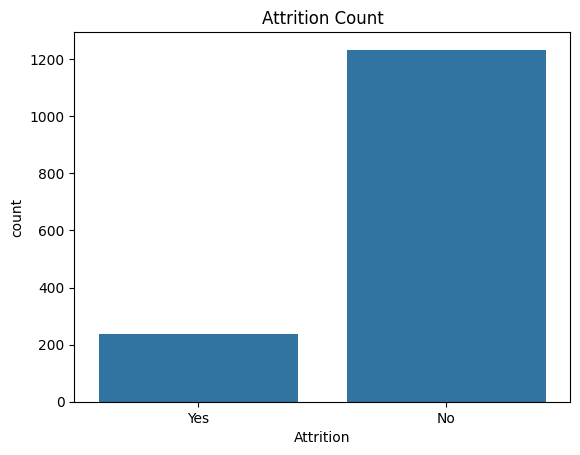

In [11]:
sns.countplot(data=df, x='Attrition')
plt.title("Attrition Count")


In [13]:
# Display all columns and their data types

print("Data Types:\n")
print(df_cleaned.dtypes)

Data Types:

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsIn

## 1.3 Split Column Types


In [14]:
#Give defintion of each type of columns

numerical_cols = [
    
    'Age',
    'DailyRate',
    'DistanceFromHome',
    'HourlyRate',
    'MonthlyIncome',
    'MonthlyRate',
    'NumCompaniesWorked',
    'PercentSalaryHike',
    'TotalWorkingYears',
    'TrainingTimesLastYear',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

nominal_cols = [
    # 'Attrition'
    'BusinessTravel',
    'Department',
    'EducationField',
    'Gender',
    'JobRole',
    'MaritalStatus',
    'OverTime',
    ]


ordinal_cols = [
    'Education',
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'JobLevel',
    'JobSatisfaction',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'StockOptionLevel',
    'WorkLifeBalance'
]

# To ensure  only using existing columns
numerical_cols = [col for col in numerical_cols if col in df_cleaned.columns]
nominal_cols   = [col for col in nominal_cols if col in df_cleaned.columns]
ordinal_cols   = [col for col in ordinal_cols if col in df_cleaned.columns]



print("Nominal cols:", nominal_cols)
print("Ordinal cols:", ordinal_cols)
print("Numerical cols:", numerical_cols)

Nominal cols: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Ordinal cols: ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
Numerical cols: ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [15]:
#Convert Attrition to Binary,the target column

df_cleaned['Attrition'] = df_cleaned['Attrition'].map({'Yes': 1, 'No': 0})


## 1.4 Handle Missing Values

In [20]:
# Display columns with missing values and their counts
missing_values = df.isnull().sum()

# Filters only columns with missing values
missing_values = missing_values[missing_values > 0]  
print("Columns with missing values and their counts:\n", missing_values)


Columns with missing values and their counts:
 Series([], dtype: int64)


## Handle Duplicate Values

In [21]:
# Check for duplicate rows in the dataset
duplicate_rows = df_cleaned[df_cleaned.duplicated()]

# Display the duplicates (if any)
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
duplicate_rows


Number of duplicate rows: 0


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


## 1.5(a) Outlier Detection(Numerical Columns)

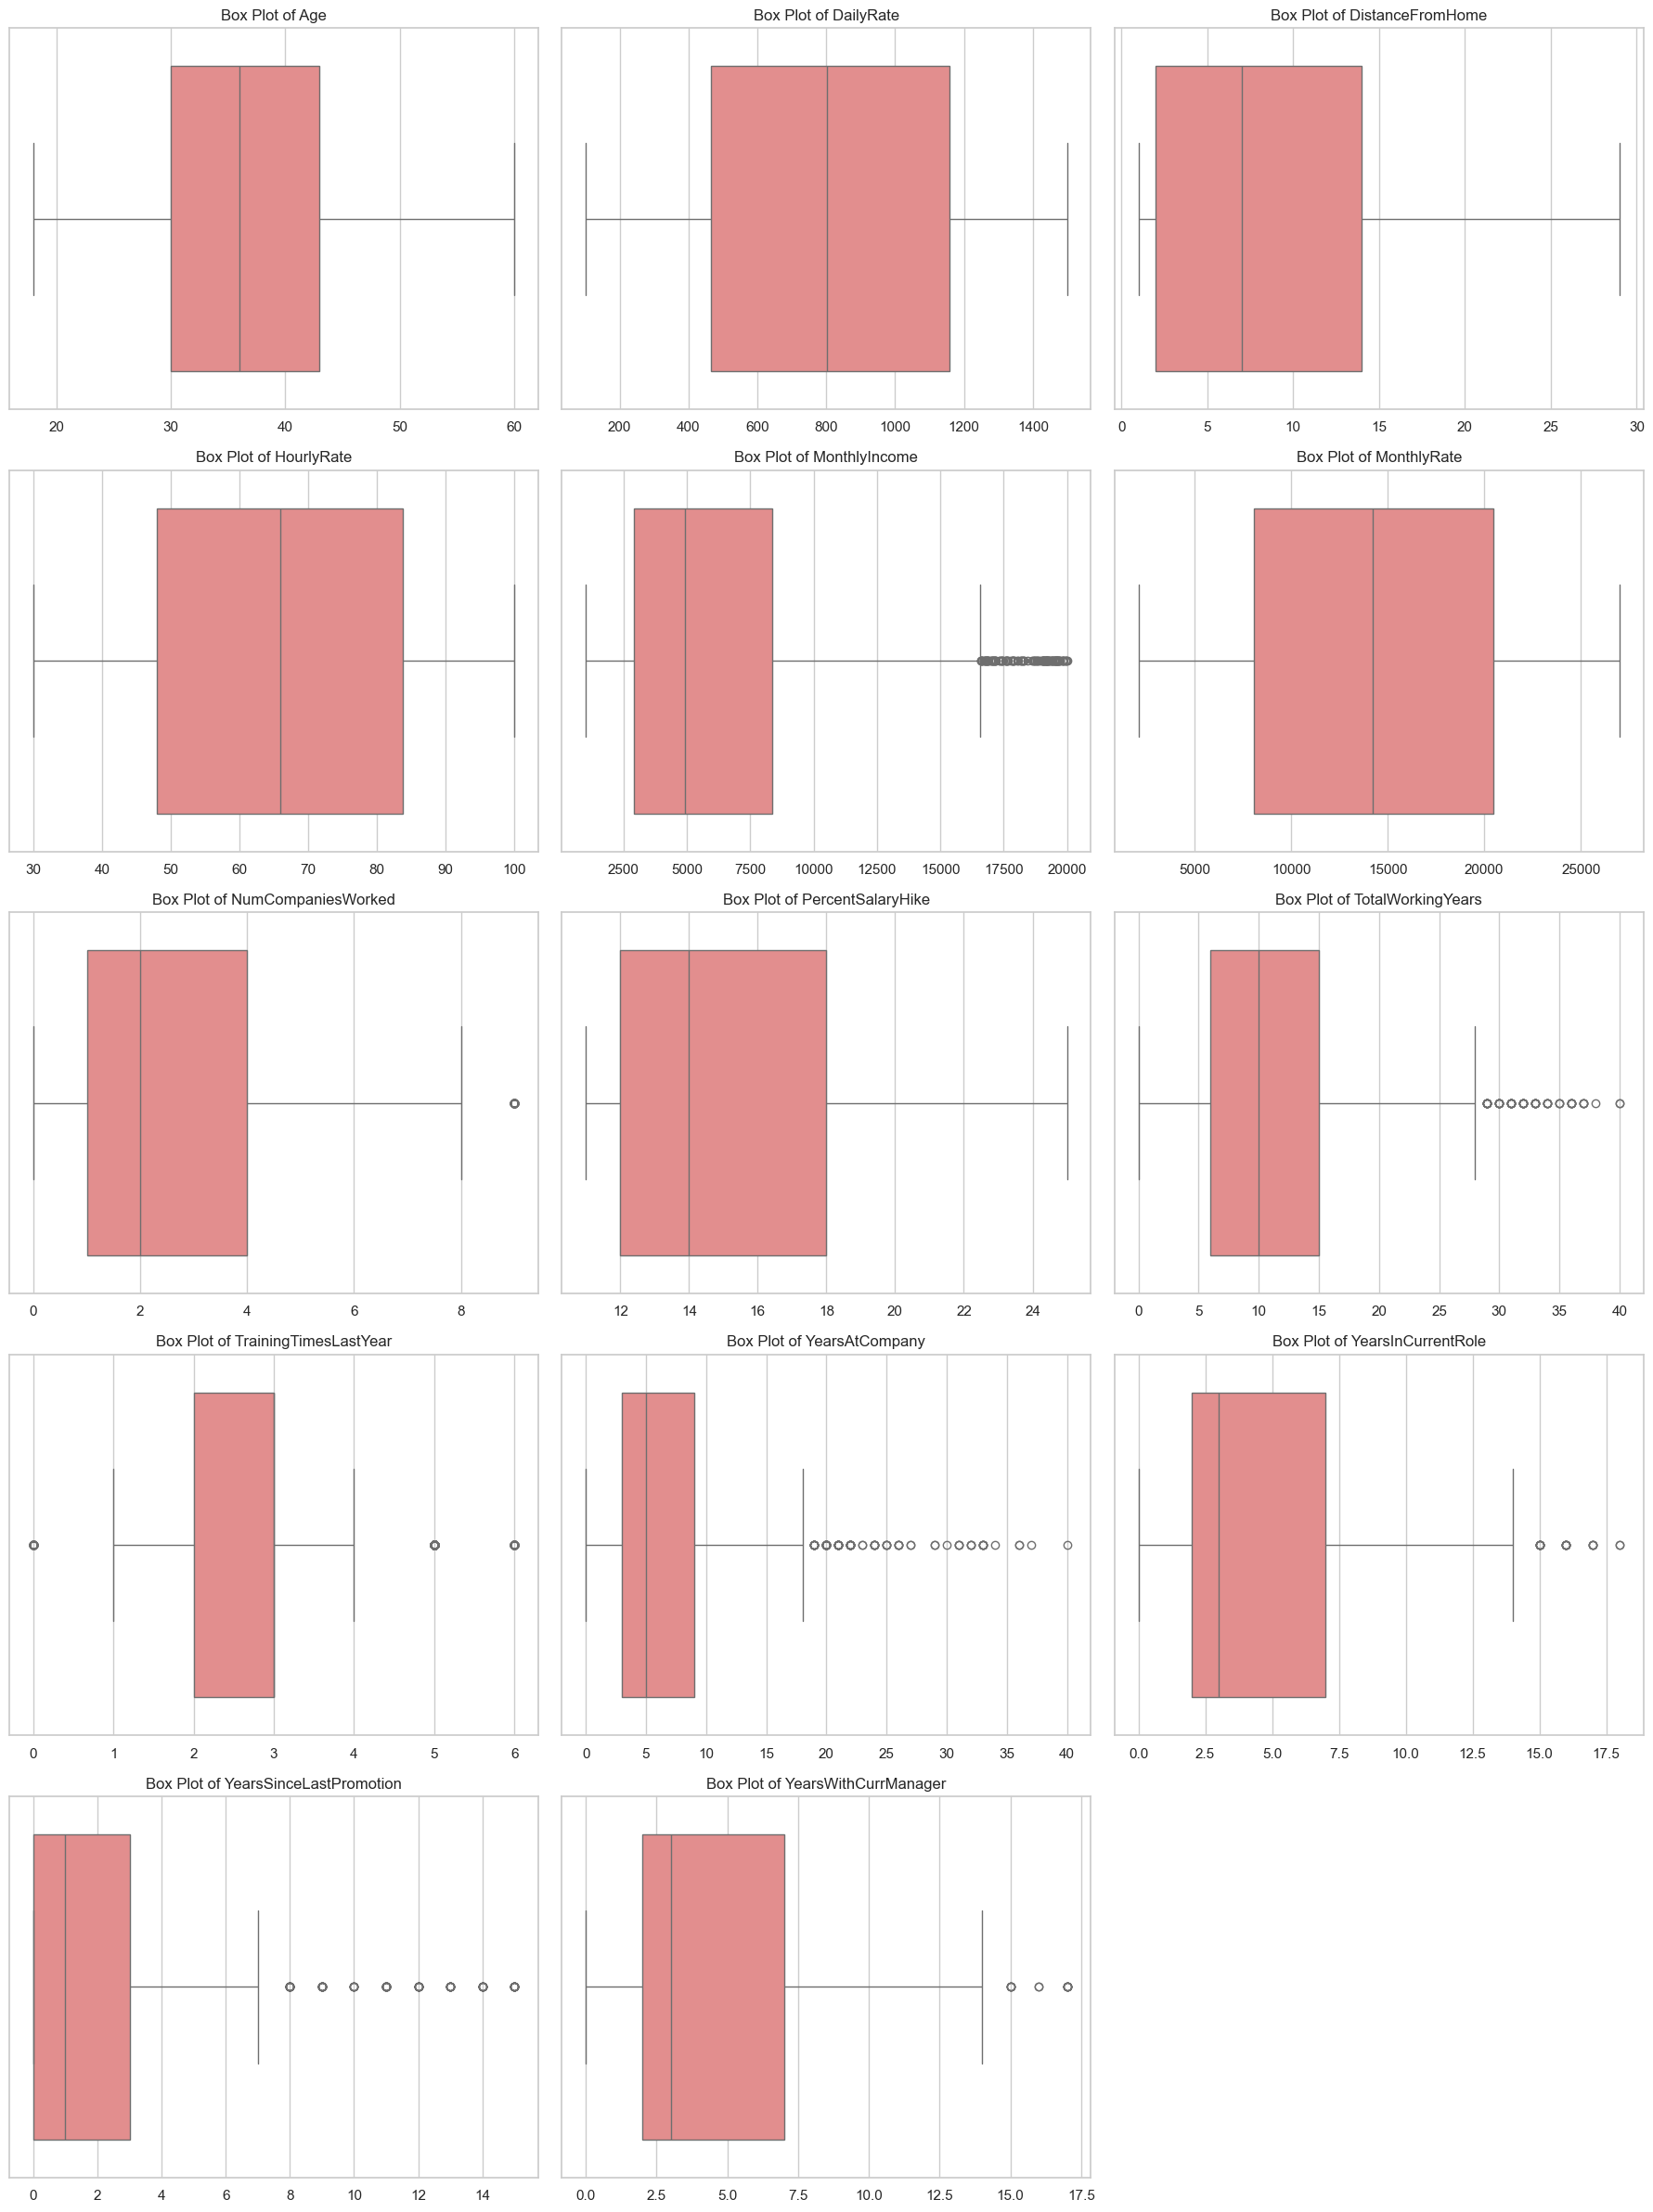

In [22]:
#For numerical cols,construct Box plots



# Set the aesthetic style of the plots
sns.set(style="whitegrid")



# Create box plots
plt.figure(figsize=(18, 24))  # Bigger figure to accommodate all plots

for i, col in enumerate(numerical_cols):
    plt.subplot(5, 3, i + 1)  # 5 rows, 3 columns of subplots
    sns.boxplot(x=df_cleaned[col], color='lightcoral')
    plt.title(f'Box Plot of {col}', fontsize=12)
    plt.xlabel('')

plt.tight_layout()
plt.show()


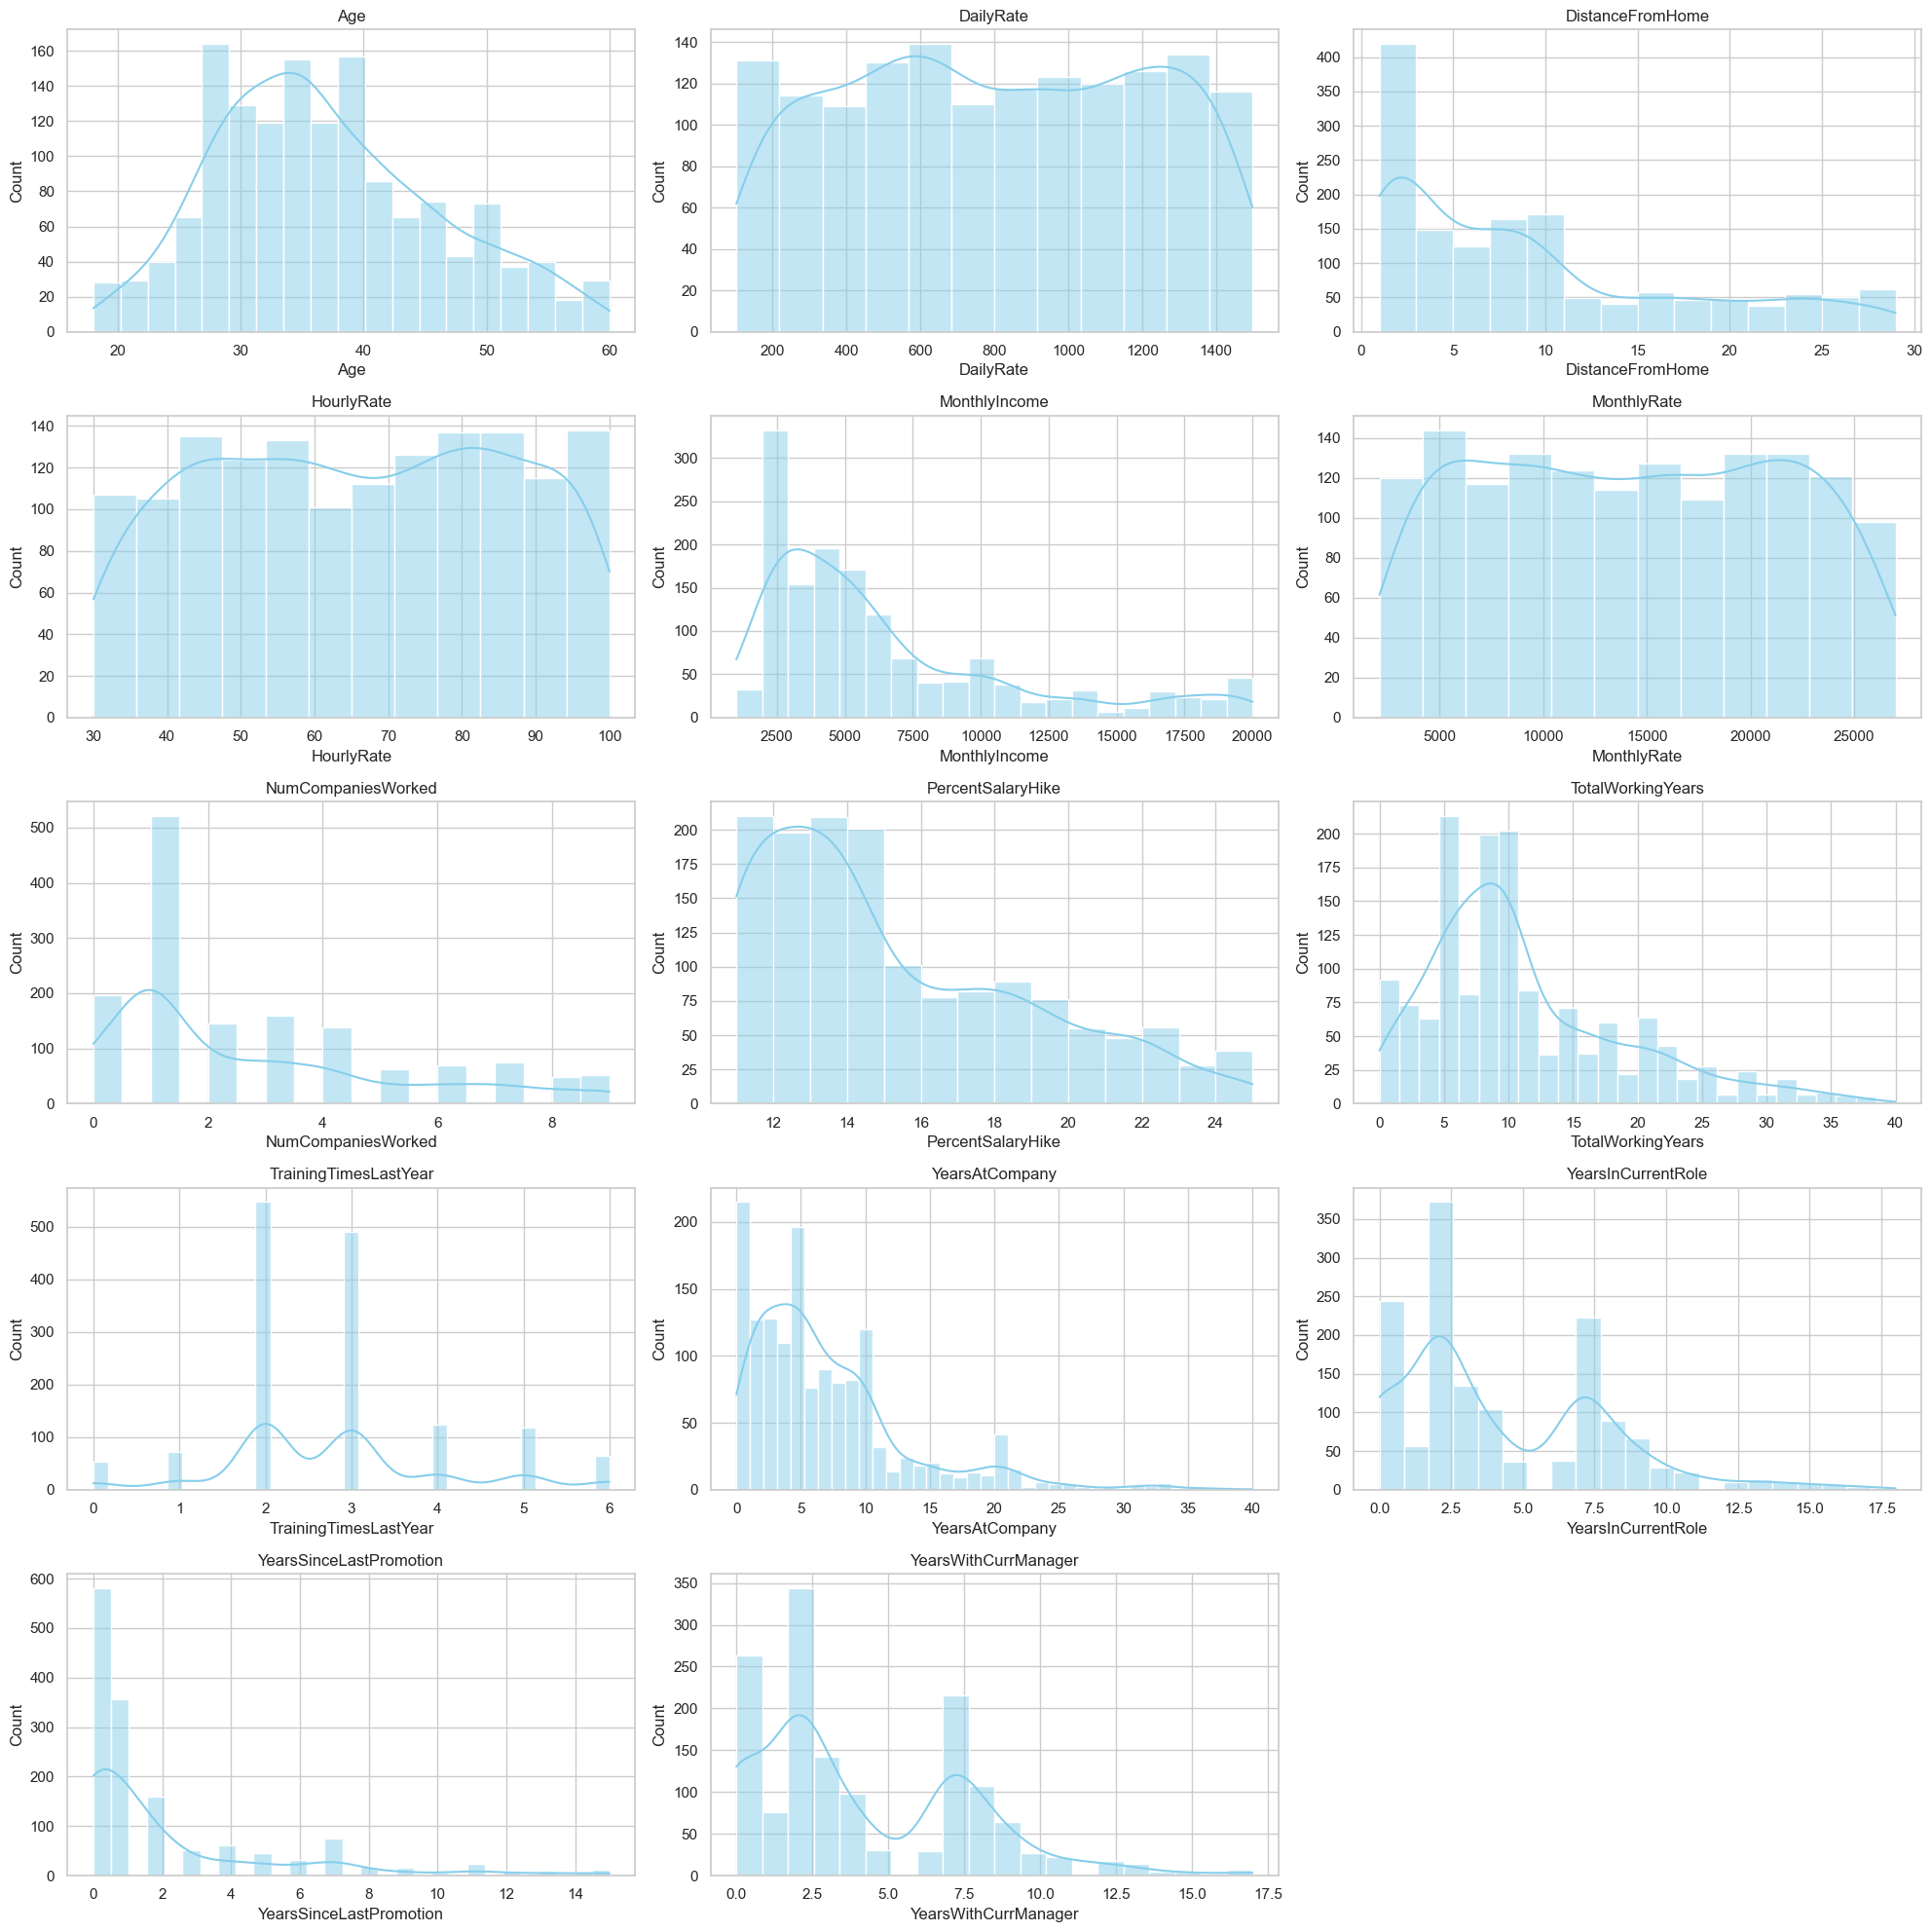

In [23]:
#Now we shall plot histogram of numerical features to decide which technique for outlier detection for each column is:

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))

# Plot each histogram in a grid layout
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 3, i+1)  # Adjust rows & cols as needed
    sns.histplot(data=df_cleaned, x=col, kde=True, color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

In [24]:
#None of numerical cols is normalized,therefore we will apply:
# 1) For Unifrom Distributions,we use percentile methods for outlier Detection
# 2) For Skewed Numerical Columns,use IQR method to detect outliers.
# 3) Only Age is normally distributed,use Z-score method to detect outliers.


In [25]:
import pandas as pd


target_cols = ['DailyRate', 'HourlyRate', 'MonthlyRate']

# Define percentile thresholds
low_percentile = 0.01
high_percentile = 0.99

# Loop through each column and detect outliers
for col in target_cols:
    lower = df_cleaned[col].quantile(low_percentile)
    upper = df_cleaned[col].quantile(high_percentile)
    
    outliers = df_cleaned[(df_cleaned[col] < lower) | (df_cleaned[col] > upper)]
    
    print(f"\n--- {col} ---")
    print(f"Lower Bound (1st percentile): {lower}")
    print(f"Upper Bound (99th percentile): {upper}")
    print(f"Number of outliers: {len(outliers)}")



--- DailyRate ---
Lower Bound (1st percentile): 117.0
Upper Bound (99th percentile): 1485.0
Number of outliers: 26

--- HourlyRate ---
Lower Bound (1st percentile): 30.0
Upper Bound (99th percentile): 100.0
Number of outliers: 0

--- MonthlyRate ---
Lower Bound (1st percentile): 2325.07
Upper Bound (99th percentile): 26704.239999999998
Number of outliers: 30


In [26]:
#For Skewed Numerical Columns,use IQR method to detect outliers.



# Columns to analyze
iqr_cols = [
    'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
    'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

# IQR method
for col in iqr_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]

    print(f"\n--- {col} ---")
    print(f"Q1: {Q1}, Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of outliers: {outliers.shape[0]}")



--- DistanceFromHome ---
Q1: 2.0, Q3: 14.0
IQR: 12.0
Lower Bound: -16.0
Upper Bound: 32.0
Number of outliers: 0

--- MonthlyIncome ---
Q1: 2911.0, Q3: 8379.0
IQR: 5468.0
Lower Bound: -5291.0
Upper Bound: 16581.0
Number of outliers: 114

--- NumCompaniesWorked ---
Q1: 1.0, Q3: 4.0
IQR: 3.0
Lower Bound: -3.5
Upper Bound: 8.5
Number of outliers: 52

--- PercentSalaryHike ---
Q1: 12.0, Q3: 18.0
IQR: 6.0
Lower Bound: 3.0
Upper Bound: 27.0
Number of outliers: 0

--- TotalWorkingYears ---
Q1: 6.0, Q3: 15.0
IQR: 9.0
Lower Bound: -7.5
Upper Bound: 28.5
Number of outliers: 63

--- TrainingTimesLastYear ---
Q1: 2.0, Q3: 3.0
IQR: 1.0
Lower Bound: 0.5
Upper Bound: 4.5
Number of outliers: 238

--- YearsAtCompany ---
Q1: 3.0, Q3: 9.0
IQR: 6.0
Lower Bound: -6.0
Upper Bound: 18.0
Number of outliers: 104

--- YearsInCurrentRole ---
Q1: 2.0, Q3: 7.0
IQR: 5.0
Lower Bound: -5.5
Upper Bound: 14.5
Number of outliers: 21

--- YearsSinceLastPromotion ---
Q1: 0.0, Q3: 3.0
IQR: 3.0
Lower Bound: -4.5
Upper Bound

In [27]:
#Age is normally distributed,use Z-score method to detect outliers.



# Compute Z-scores for Age
z_scores = zscore(df_cleaned['Age'])

# Define threshold for Z-score (typically 3)
threshold = 3

# Detect outliers (Z-score > 3 or < -3)
outliers = df_cleaned[np.abs(z_scores) > threshold]

print(f"Number of outliers in 'Age': {len(outliers)}")
print(outliers['Age'])



Number of outliers in 'Age': 0
Series([], Name: Age, dtype: int64)


## 1.5.1 Outlier Treatment

In [28]:
def cap_outliers_iqr(df_cleaned, column):
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned[column] = df_cleaned[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df_cleaned

# Columns to cap (based on above)
cap_cols = [
    'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears',
    'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

for col in cap_cols:
    df_cleaned = cap_outliers_iqr(df_cleaned, col)


In [29]:
#For this column,IQR detects outliers,which are not outliers actually,having looked at the dataset,so we keep it as it is.
print(df_cleaned['TrainingTimesLastYear'].value_counts())


TrainingTimesLastYear
2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: count, dtype: int64


## 1.5(b) Outlier Detection(Categorical Columns)

C:\Users\Rufus\AppData\Local\Temp\ipykernel_13492\2725750749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette="pastel", order=df_cleaned[col].value_counts().index)


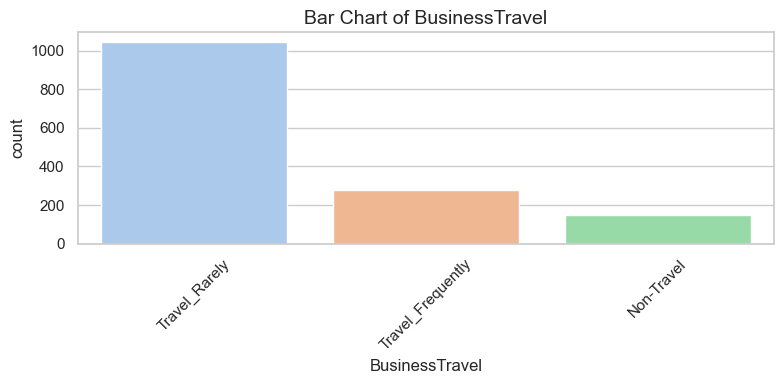

C:\Users\Rufus\AppData\Local\Temp\ipykernel_13492\2725750749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette="pastel", order=df_cleaned[col].value_counts().index)


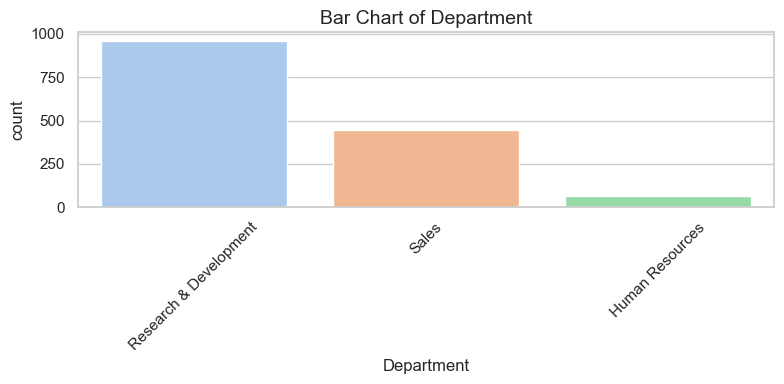

C:\Users\Rufus\AppData\Local\Temp\ipykernel_13492\2725750749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette="pastel", order=df_cleaned[col].value_counts().index)


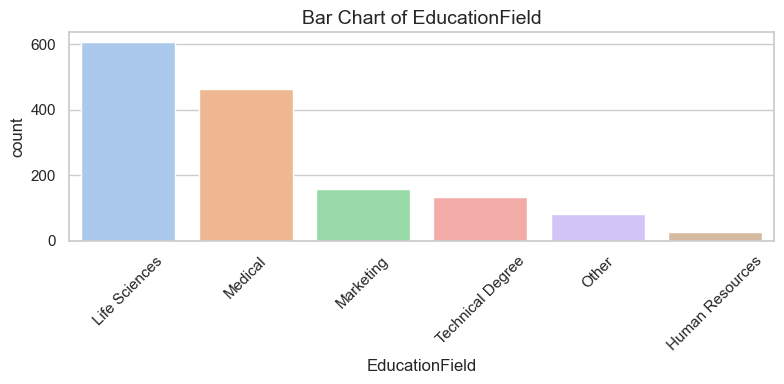

C:\Users\Rufus\AppData\Local\Temp\ipykernel_13492\2725750749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette="pastel", order=df_cleaned[col].value_counts().index)


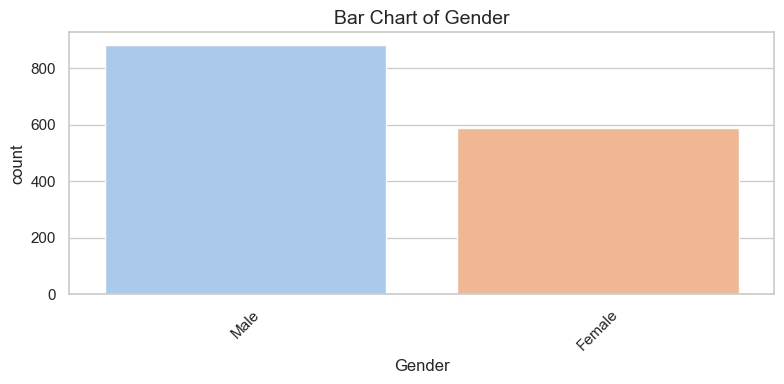

C:\Users\Rufus\AppData\Local\Temp\ipykernel_13492\2725750749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette="pastel", order=df_cleaned[col].value_counts().index)


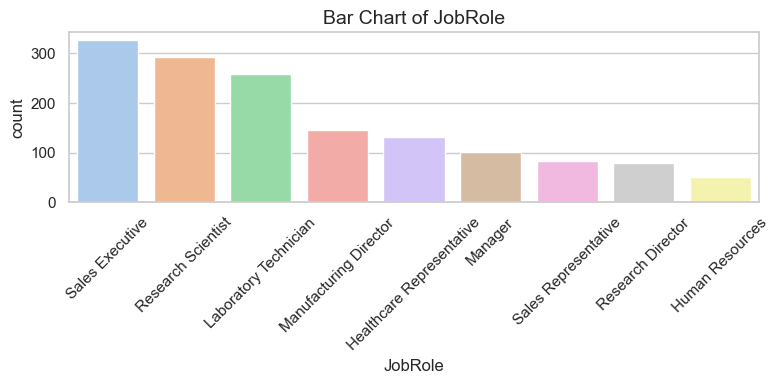

C:\Users\Rufus\AppData\Local\Temp\ipykernel_13492\2725750749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette="pastel", order=df_cleaned[col].value_counts().index)


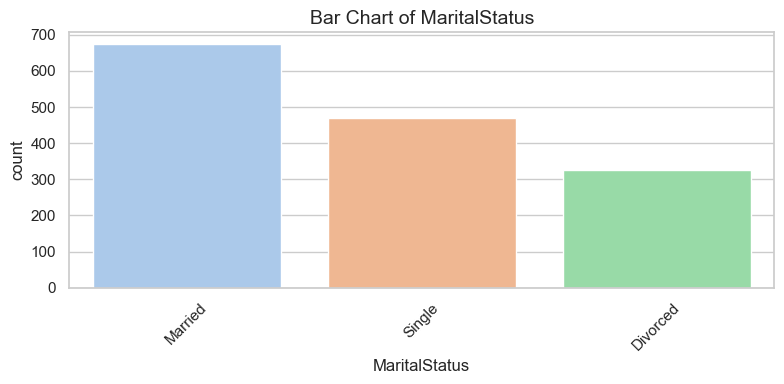

C:\Users\Rufus\AppData\Local\Temp\ipykernel_13492\2725750749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette="pastel", order=df_cleaned[col].value_counts().index)


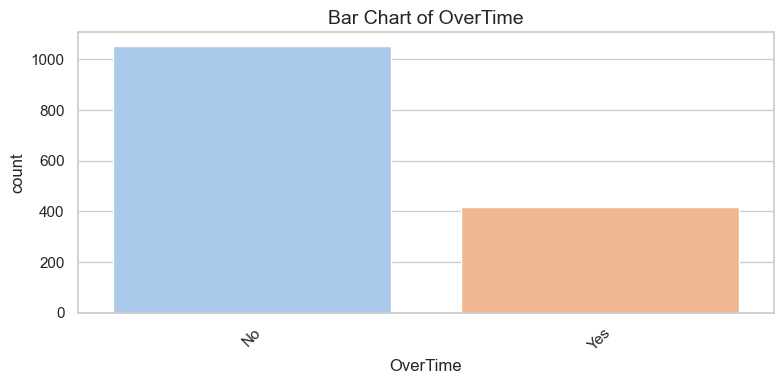

C:\Users\Rufus\AppData\Local\Temp\ipykernel_13492\2725750749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette="pastel", order=df_cleaned[col].value_counts().index)


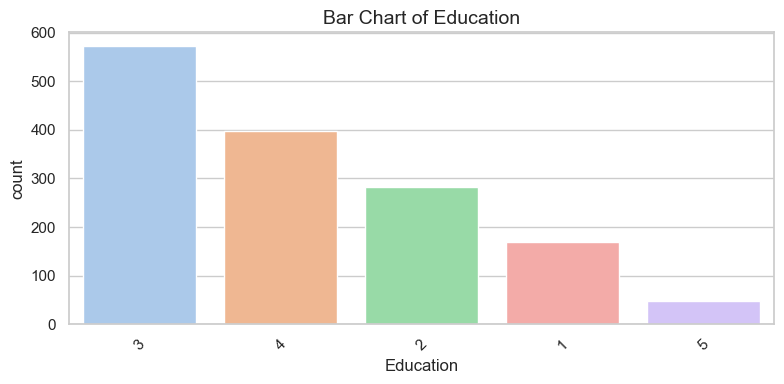

C:\Users\Rufus\AppData\Local\Temp\ipykernel_13492\2725750749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette="pastel", order=df_cleaned[col].value_counts().index)


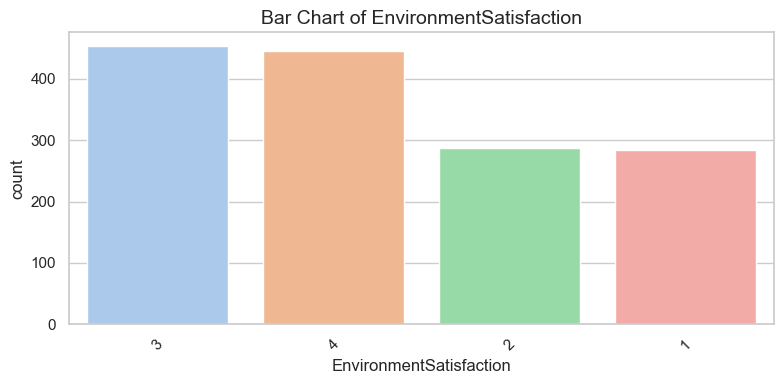

C:\Users\Rufus\AppData\Local\Temp\ipykernel_13492\2725750749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette="pastel", order=df_cleaned[col].value_counts().index)


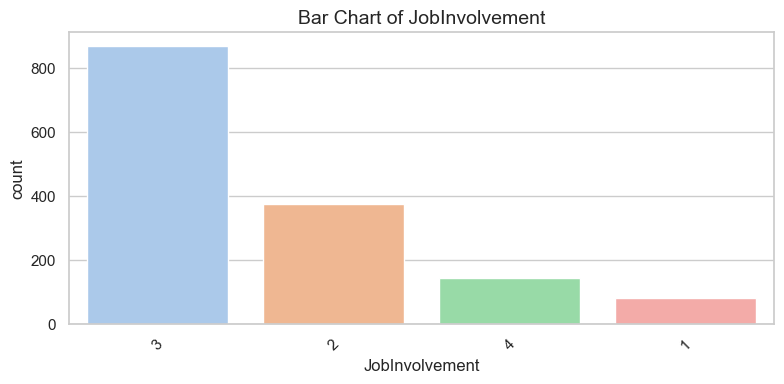

C:\Users\Rufus\AppData\Local\Temp\ipykernel_13492\2725750749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette="pastel", order=df_cleaned[col].value_counts().index)


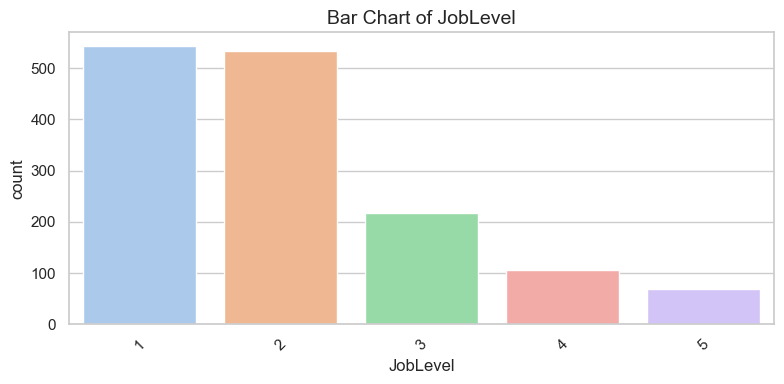

C:\Users\Rufus\AppData\Local\Temp\ipykernel_13492\2725750749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette="pastel", order=df_cleaned[col].value_counts().index)


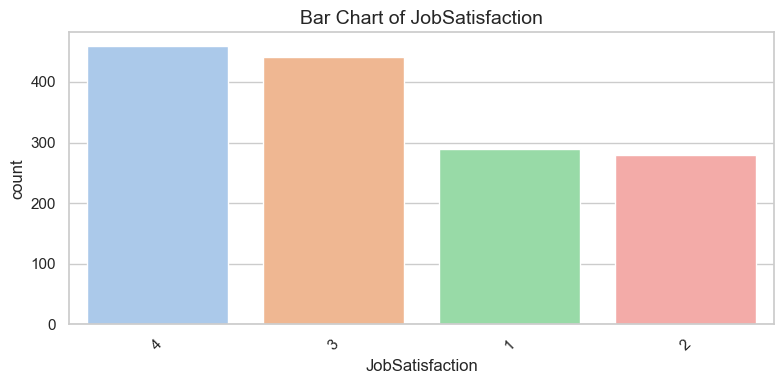

C:\Users\Rufus\AppData\Local\Temp\ipykernel_13492\2725750749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette="pastel", order=df_cleaned[col].value_counts().index)


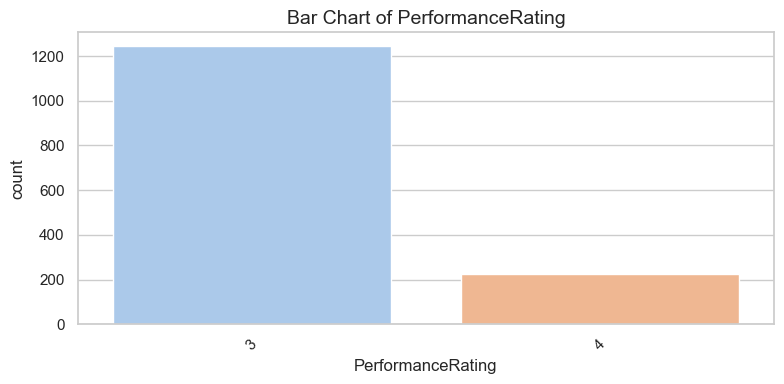

C:\Users\Rufus\AppData\Local\Temp\ipykernel_13492\2725750749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette="pastel", order=df_cleaned[col].value_counts().index)


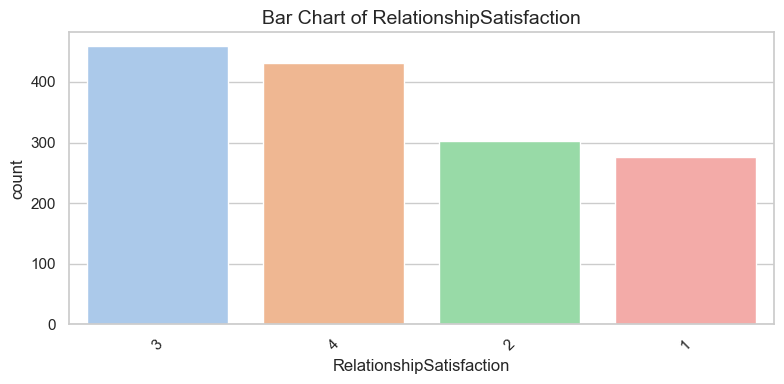

C:\Users\Rufus\AppData\Local\Temp\ipykernel_13492\2725750749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette="pastel", order=df_cleaned[col].value_counts().index)


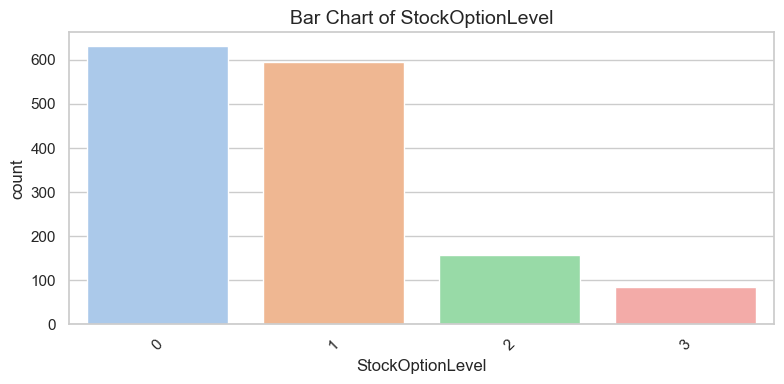

C:\Users\Rufus\AppData\Local\Temp\ipykernel_13492\2725750749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette="pastel", order=df_cleaned[col].value_counts().index)


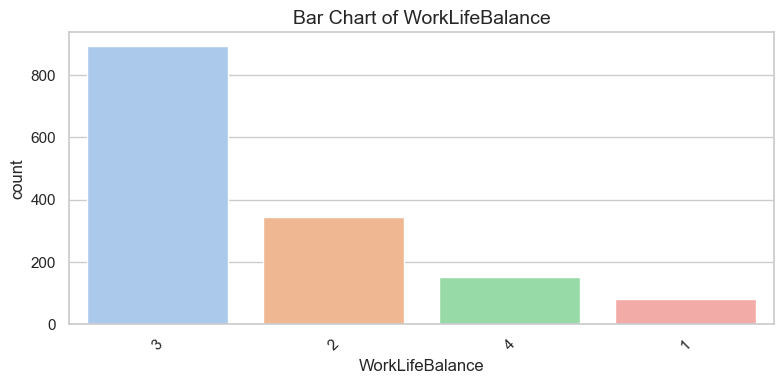

In [30]:
#For categorical Columns,observe Visualization to observer any outliers
categorical_cols = nominal_cols + ordinal_cols

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_cleaned, x=col, palette="pastel", order=df_cleaned[col].value_counts().index)
    plt.title(f'Bar Chart of {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [31]:
# Combine both categorical column types
categorical_cols = nominal_cols + ordinal_cols

# Print frequency tables
for col in categorical_cols:
    print(f"🧾 Frequency Table for '{col}':\n")
    print(df_cleaned[col].value_counts(dropna=False))
    print("-" * 50)


🧾 Frequency Table for 'BusinessTravel':

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
--------------------------------------------------
🧾 Frequency Table for 'Department':

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
--------------------------------------------------
🧾 Frequency Table for 'EducationField':

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
--------------------------------------------------
🧾 Frequency Table for 'Gender':

Gender
Male      882
Female    588
Name: count, dtype: int64
--------------------------------------------------
🧾 Frequency Table for 'JobRole':

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturi

In [33]:
#We will keep the categorical cols(nominal + ordinal)as it is.

# 2. EDA & Correlation

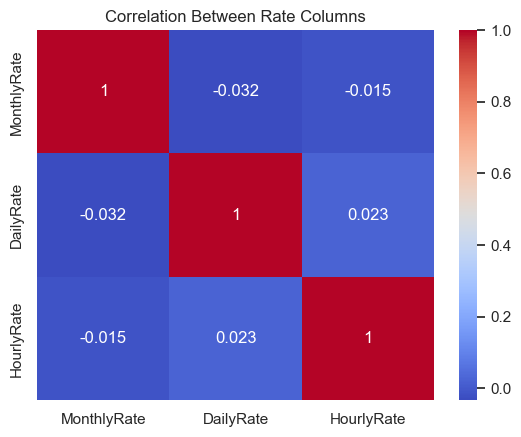

In [ ]:
#Upon examining the data in csv,we notice MonthlyRate, DailyRate, HourlyRate have similar values,let's plot heat map to confirm.

rate_cols = ['MonthlyRate', 'DailyRate', 'HourlyRate']
corr_matrix = df[rate_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Rate Columns")
plt.show()


In [35]:
#Very Low Correlation:
# The correlation values between MonthlyRate, DailyRate, and HourlyRate are all close to zero.
# Rates Are Independent:
# There's no strong linear relationship between any of the rate columns, suggesting they vary independently.
# No Redundancy:
# Since the rates aren’t correlated, each one may provide unique information and shouldn't be dropped due to redundancy.
# Possible Reason:
# This could happen if rates are assigned differently across roles or departments, without a consistent formula.

In [37]:
# 1. Copy clean dataset


df_encoded = df_cleaned.copy()

# 2. Ordinal Encoding
ordinal_encoder = OrdinalEncoder()
df_encoded[ordinal_cols] = ordinal_encoder.fit_transform(df_encoded[ordinal_cols])

# 3. One-Hot Encoding on Nominal Columns
ohe = OneHotEncoder(drop='first', sparse_output=False)
ohe_array = ohe.fit_transform(df_encoded[nominal_cols])
ohe_df = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out(nominal_cols), index=df_encoded.index)

# 4. Drop original nominal columns
df_encoded.drop(columns=nominal_cols, inplace=True)

# 5. Concatenate everything
df_encoded = pd.concat([df_encoded, ohe_df], axis=1)

C:\Users\Rufus\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


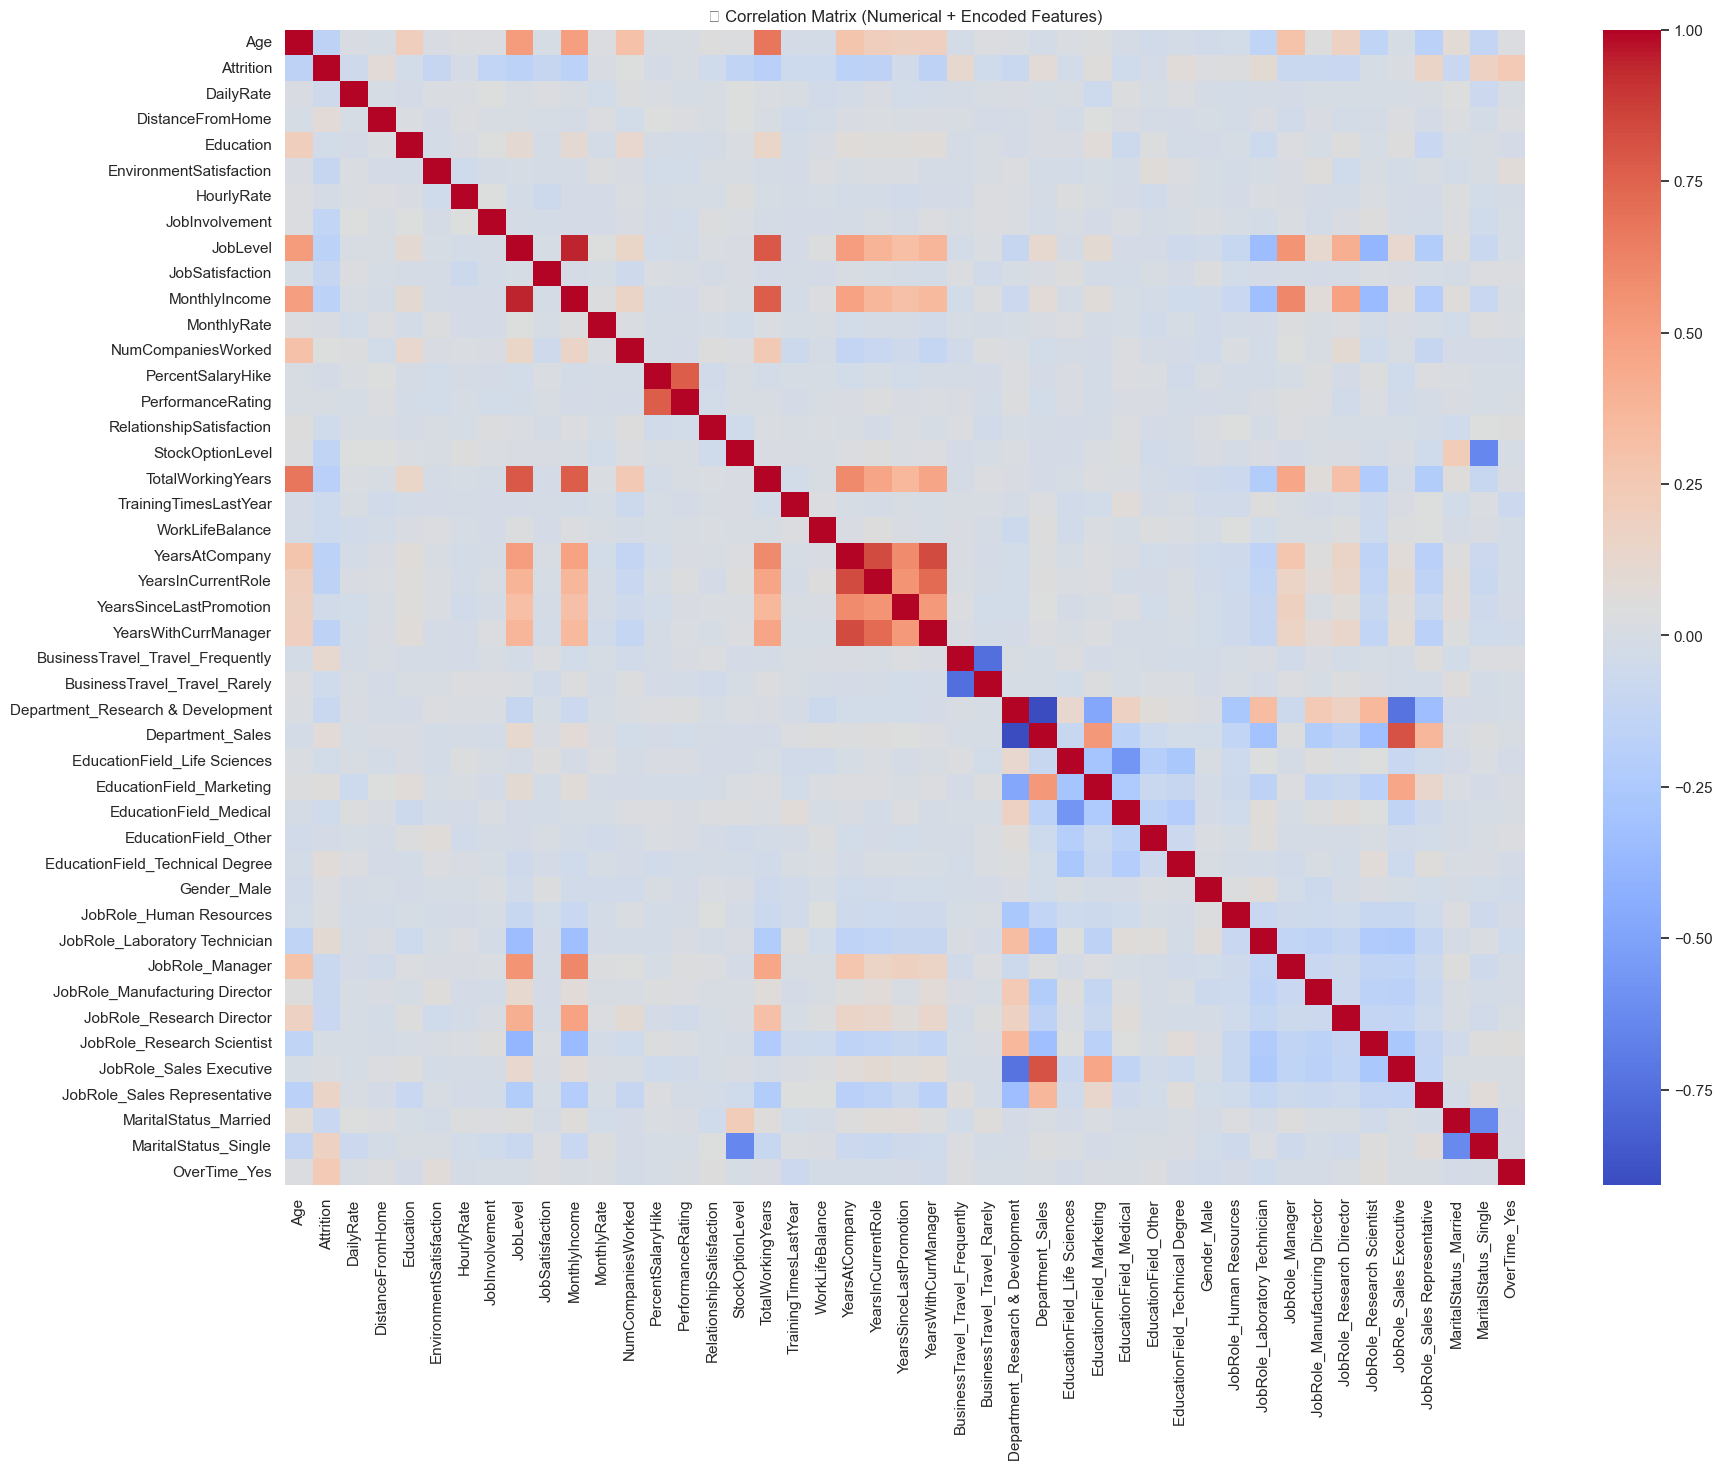

In [38]:


# Just to be safe: Drop any non-numeric cols (should be none after encoding)
df_encoded = df_encoded.select_dtypes(include=['number'])

# Correlation matrix
corr_matrix = df_encoded.corr()

# Plot full matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("📈 Correlation Matrix (Numerical + Encoded Features)")
plt.show()


In [39]:
# Sort by correlation with Attrition
target_corr = corr_matrix['Attrition'].sort_values(key=abs, ascending=False)
print(" Features Most Correlated with Attrition:")
print(target_corr[1:11])  # [1:11] to skip "Attrition vs Attrition" (always = 1)


 Features Most Correlated with Attrition:
OverTime_Yes                    0.246118
TotalWorkingYears              -0.180628
MaritalStatus_Single            0.175419
JobLevel                       -0.169105
MonthlyIncome                  -0.164778
YearsAtCompany                 -0.162211
YearsInCurrentRole             -0.161484
Age                            -0.159205
JobRole_Sales Representative    0.157234
YearsWithCurrManager           -0.156498
Name: Attrition, dtype: float64


C:\Users\Rufus\AppData\Local\Temp\ipykernel_13492\836346184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr[1:11].values, y=target_corr[1:11].index, palette="coolwarm")


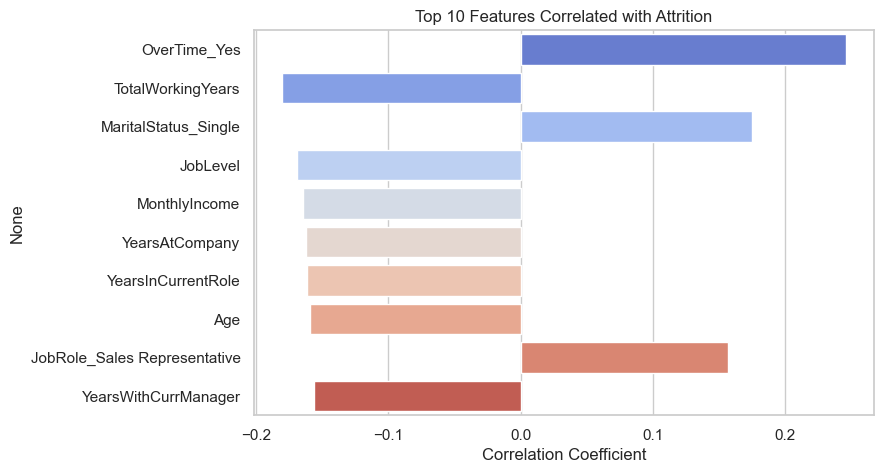

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(x=target_corr[1:11].values, y=target_corr[1:11].index, palette="coolwarm")
plt.title("Top 10 Features Correlated with Attrition")
plt.xlabel("Correlation Coefficient")
plt.show()


In [41]:
# ===========================
# Feature Redundancy Comments
# ===========================

# 1. MonthlyIncome, JobLevel, TotalWorkingYears
# These three features are highly correlated because they all reflect employee seniority and experience level.
# - JobLevel increases with experience, and typically higher levels earn higher MonthlyIncome.
# - TotalWorkingYears influences both JobLevel and compensation over time.
# => Action: Keep one (e.g., MonthlyIncome) and drop the others to avoid multicollinearity.

# 2. YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager, YearsSinceLastPromotion
# These are all time-based features related to an employee's tenure in the company.
# - Naturally, employees with more YearsAtCompany tend to have more time in their role and with their manager.
# - These variables are likely to move together and introduce redundancy.
# => Action: Keep the most informative or predictive feature (e.g., YearsAtCompany), drop or combine the rest.

# 3. PercentSalaryHike and PerformanceRating
# These features may be correlated because raises (PercentSalaryHike) are often performance-based.
# - High performance ratings usually lead to salary increases, creating a dependency.
# => Action: If needed, keep the one more directly related to attrition or more variable across the dataset.

# 4. Education-related dummy variables (e.g., EducationField_* one-hot columns)
# One-hot encoded education fields are sparse and often do not carry strong correlation with attrition.
# - Additionally, they can introduce multicollinearity if multiple dummies are included simultaneously.
# => Action: Consider dimensionality reduction or keeping only the most frequent/important fields.

# Overall:
# Removing one or more variable from each of these correlated pairs/groups helps reduce redundancy,
# avoids inflating variance in model coefficients, and improves generalization.


In [42]:
#Now we selectively drop less informative features.

#  Group 1: MonthlyIncome, JobLevel, TotalWorkingYears
# Reason: These features are highly correlated. We keep 'MonthlyIncome' because it's continuous,
# has greater variance, and is more HR-actionable (actual salary). 'JobLevel' is dropped since it's ordinal,
# and 'TotalWorkingYears' overlaps with both income and tenure features.
drop_cols = ['JobLevel', 'TotalWorkingYears']

#  Group 2: YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager, YearsSinceLastPromotion
# Reason: These are all time-based features that overlap in meaning. We keep:
# - 'YearsAtCompany' to capture overall tenure
# - 'YearsWithCurrManager' to reflect manager relationship duration (important for retention)
# We drop:
# - 'YearsInCurrentRole' (part of YearsAtCompany)
# - 'YearsSinceLastPromotion' (correlates with others and has unclear impact)
drop_cols += ['YearsInCurrentRole', 'YearsSinceLastPromotion']

#  Group 3: PercentSalaryHike vs PerformanceRating
# Reason: 'PerformanceRating' is mostly constant (many employees rated the same),
# while 'PercentSalaryHike' has greater variation and is a better proxy for performance recognition.
drop_cols += ['PerformanceRating']

#  Group 4: One-hot Encoded Dummies with Low Variance
# Apply VarianceThreshold to remove OHE columns with very low variance (sparse info)



# VarianceThreshold works only on numerical data
selector = VarianceThreshold(threshold=0.01)
selector.fit(df_cleaned.select_dtypes(include='number'))

# Retain only features that passed the variance threshold
high_variance_features = df_cleaned.select_dtypes(include='number').columns[selector.get_support()]
df_cleaned = df_cleaned[high_variance_features]

# Drop the additional redundant features identified manually
df_cleaned.drop(columns=drop_cols, inplace=True, errors='ignore')  # errors='ignore' avoids crash if column already removed

# ✅ df_cleaned is now reduced and ready for modeling pipeline (encoding, scaling, training)


In [43]:
df_cleaned.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,4,5993.0,19479,8.0,11,1,0,0,1,6.0,5.0
1,49,0,279,8,1,3,61,2,2,5130.0,24907,1.0,23,4,1,3,3,10.0,7.0
2,37,1,1373,2,2,4,92,2,3,2090.0,2396,6.0,15,2,0,3,3,0.0,0.0
3,33,0,1392,3,4,4,56,3,3,2909.0,23159,1.0,11,3,0,3,3,8.0,0.0
4,27,0,591,2,1,1,40,3,2,3468.0,16632,8.5,12,4,1,3,3,2.0,2.0


In [44]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   DailyRate                 1470 non-null   int64  
 3   DistanceFromHome          1470 non-null   int64  
 4   Education                 1470 non-null   int64  
 5   EnvironmentSatisfaction   1470 non-null   int64  
 6   HourlyRate                1470 non-null   int64  
 7   JobInvolvement            1470 non-null   int64  
 8   JobSatisfaction           1470 non-null   int64  
 9   MonthlyIncome             1470 non-null   float64
 10  MonthlyRate               1470 non-null   int64  
 11  NumCompaniesWorked        1470 non-null   float64
 12  PercentSalaryHike         1470 non-null   int64  
 13  RelationshipSatisfaction  1470 non-null   int64  
 14  StockOpt

In [45]:
# List all remaining columns
print(df_cleaned.columns.tolist())


['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsWithCurrManager']


## 2.2 Update Columns split after dropping


In [46]:
#Update Column Grouping After dropping Features

numerical_cols = [
    'Age',
    'DailyRate',
    'DistanceFromHome',
    'HourlyRate',
    'MonthlyIncome',
    'MonthlyRate',
    'NumCompaniesWorked',
    'PercentSalaryHike',
    'TrainingTimesLastYear',
    'YearsAtCompany',
    'YearsWithCurrManager'
]


ordinal_cols = [
    'Education',
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'JobSatisfaction',
    'RelationshipSatisfaction',
    'StockOptionLevel',
    'WorkLifeBalance'
]

nominal_cols = [
    'Attrition'  # Binary target variable — will be excluded from predictors later
]


print("Numerical columns:", numerical_cols)
print("Ordinal columns:", ordinal_cols)
print("Nominal columns:", nominal_cols)




Numerical columns: ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsWithCurrManager']
Ordinal columns: ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
Nominal columns: ['Attrition']


# 3. Pipeline Setup for Training

## 3.1 Split into X & Y

In [47]:
#Split into x and y

y = df_cleaned['Attrition']
X = df_cleaned.drop('Attrition', axis=1)


## 3.2 Combine into Pipeline

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier  # or LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# For numerical features: impute + scale
numerical_pipeline = Pipeline([
    
    ('scaler', StandardScaler())
])

# For ordinal features: impute + ordinal encode
ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder())
])

# 4. Combine in a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('ord', ordinal_pipeline, ordinal_cols)
])

## 3.3 Visualize Distribution of Target Feature->Attrition

C:\Users\Rufus\AppData\Local\Temp\ipykernel_13492\3096435218.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Attrition', palette='pastel')


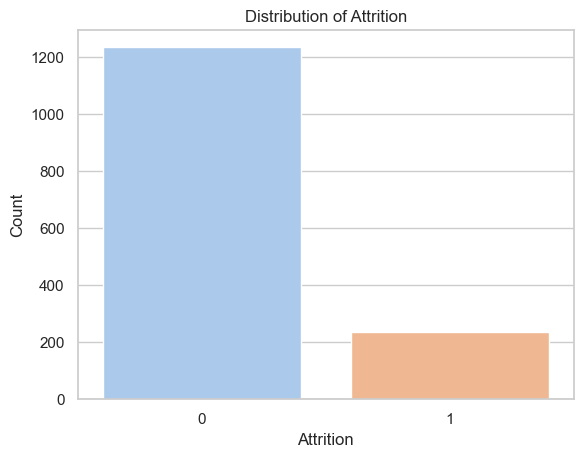

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_cleaned, x='Attrition', palette='pastel')
plt.title('Distribution of Attrition')
plt.ylabel('Count')
plt.xlabel('Attrition')
plt.show()


# 4.  Modeling, Evaluation, and Explanation

In [50]:
#Imbalanced class would result in biased conclusion,use SMOTE technique.

 # Step 1: Define the Models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),

}

# Apply evaluation metrics: 
# o Classification: Accuracy, Precision, Recall, F1-score, ROC-AUC. 
# o Regression: RMSE, MAE, R² Score.


## 4.1 Train,test & split

In [51]:


# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



## 4.2 Build pipeline with SMOTE and classifier

In [52]:
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 


smote = SMOTE(random_state=42)

for name, model in models.items():
    # Build pipeline with SMOTE and classifier
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('smote', smote),
        ('classifier', model)
    ])
    
    # Train on balanced training data
    pipeline.fit(X_train, y_train)
    
    # Predict on untouched, real distribution
    y_pred = pipeline.predict(X_test)
    
    # Evaluate
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Model: Logistic Regression
Accuracy: 0.6768707482993197
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.69      0.78       247
           1       0.27      0.62      0.38        47

    accuracy                           0.68       294
   macro avg       0.59      0.65      0.58       294
weighted avg       0.80      0.68      0.72       294


Model: Random Forest
Accuracy: 0.8095238095238095
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       247
           1       0.32      0.17      0.22        47

    accuracy                           0.81       294
   macro avg       0.59      0.55      0.56       294
weighted avg       0.77      0.81      0.78       294



## 4.3 Evaluate with Metrics


 Model: Logistic Regression
Accuracy: 0.6768707482993197
ROC AUC: 0.692135412180205
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.69      0.78       247
           1       0.27      0.62      0.38        47

    accuracy                           0.68       294
   macro avg       0.59      0.65      0.58       294
weighted avg       0.80      0.68      0.72       294



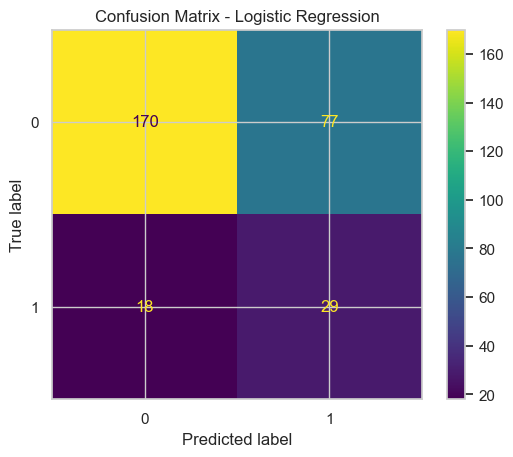


 Model: Random Forest
Accuracy: 0.8095238095238095
ROC AUC: 0.6468688086829184
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       247
           1       0.32      0.17      0.22        47

    accuracy                           0.81       294
   macro avg       0.59      0.55      0.56       294
weighted avg       0.77      0.81      0.78       294



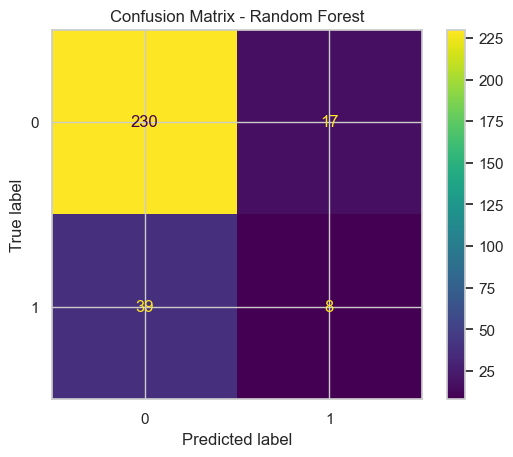

In [ ]:

best_model = None
best_auc = 0

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    print(f"\n Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Save best model
    if roc_auc_score(y_test, y_proba) > best_auc:
        best_model = pipeline
        best_auc = roc_auc_score(y_test, y_proba)
        best_model_name = name


## 4.4 Confusion Matrix Insights

In [54]:
#  Confusion Matrix Insights

#  Random Forest:
# - Very good at predicting who stays (TN = 227)
# - Misses most who actually leave (TP = 8, FN = 39)
# - Low recall for attrition — biased toward majority class
# - Use when avoiding false alarms is a priority (stable roles, low churn risk)

#  Logistic Regression:
# - Better at catching leavers (TP = 29, FN = 18)
# - More false alarms (FP = 77)
# - Higher recall for attrition — identifies at-risk employees earlier
# - Use when early intervention matters (e.g., costly roles, proactive retention)


## 4.5 Plot ROC curve

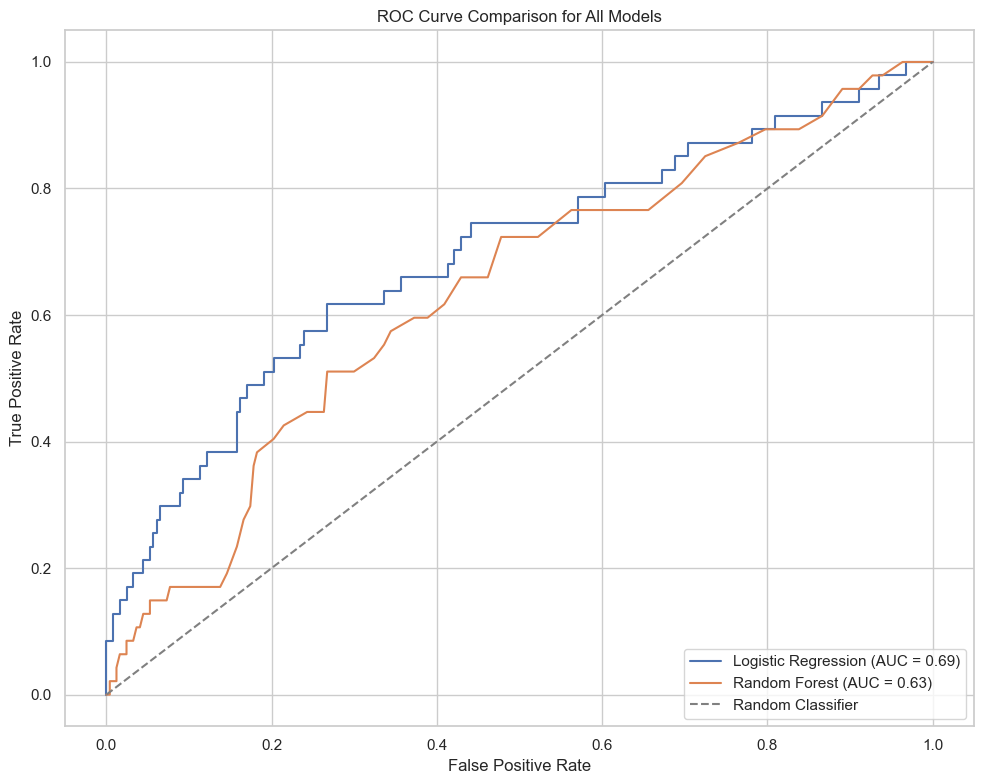


Best model based on AUC: Logistic Regression (AUC = 0.69)


In [55]:


plt.figure(figsize=(10, 8))

# Track best model (optional)
best_auc = 0
best_model = None

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_proba = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for ROC

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    model_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {model_auc:.2f})")

    # Track best
    if model_auc > best_auc:
        best_auc = model_auc
        best_model = pipeline
        best_model_name = name

# Plot random baseline
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Classifier')

# Customize plot
plt.title("ROC Curve Comparison for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"\nBest model based on AUC: {best_model_name} (AUC = {best_auc:.2f})")


## 4.6 Hyperparameter Tuning

In [56]:


#Random Forest Tuning

param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],           # More trees → better stability
    'classifier__max_depth': [10, 20, 30],                 # Try deeper trees
    'classifier__min_samples_split': [2, 5, 10],           # Regularize splits
    'classifier__min_samples_leaf': [1, 2, 4],             # Prevent overfitting
    'classifier__max_features': ['sqrt', 'log2']           # Reduce feature correlation
}


pipeline_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Random Forest Params:", grid_rf.best_params_)
print("Best AUC Score (RF):", grid_rf.best_score_)


Best Random Forest Params: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best AUC Score (RF): 0.7492464047366532


In [57]:


pipeline_lr = Pipeline([
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, solver='saga', max_iter=5000))
])

# Grid with penalty types that saga supports + C values + optional l1_ratio
param_grid_lr = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__l1_ratio': [0, 0.25, 0.5, 0.75, 1]  # Only used for elasticnet
}

grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1, error_score='raise')
grid_lr.fit(X_train, y_train)

print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best AUC Score (LR):", grid_lr.best_score_)


Best Logistic Regression Params: {'classifier__C': 0.01, 'classifier__l1_ratio': 0, 'classifier__penalty': 'l2'}
Best AUC Score (LR): 0.7476003691739732


C:\Users\Rufus\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


## 4.7 ROC Curve after Hyperparameter Tuning

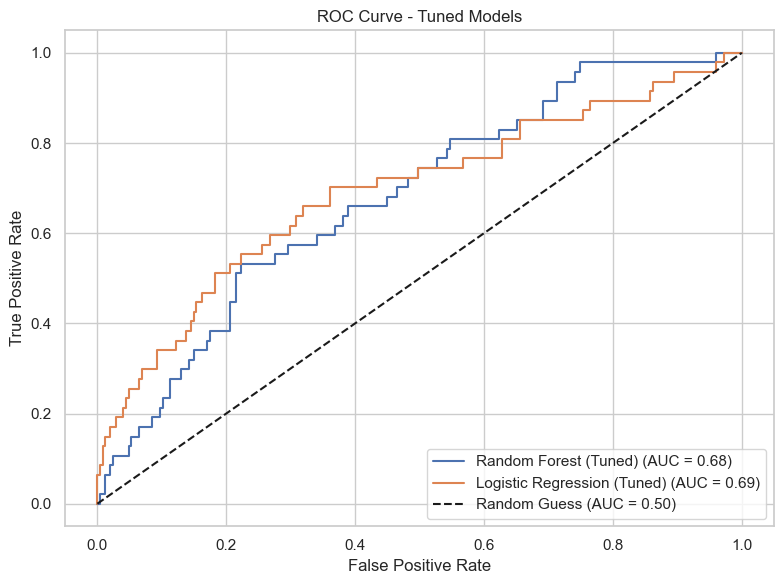

In [58]:



models = {
    "Random Forest (Tuned)": grid_rf.best_estimator_,
    "Logistic Regression (Tuned)": grid_lr.best_estimator_
}

plt.figure(figsize=(8, 6))

for name, pipeline in models.items():
    y_probs = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


## 4.8 Using SHAP

 Explaining best model with SHAP: Logistic Regression


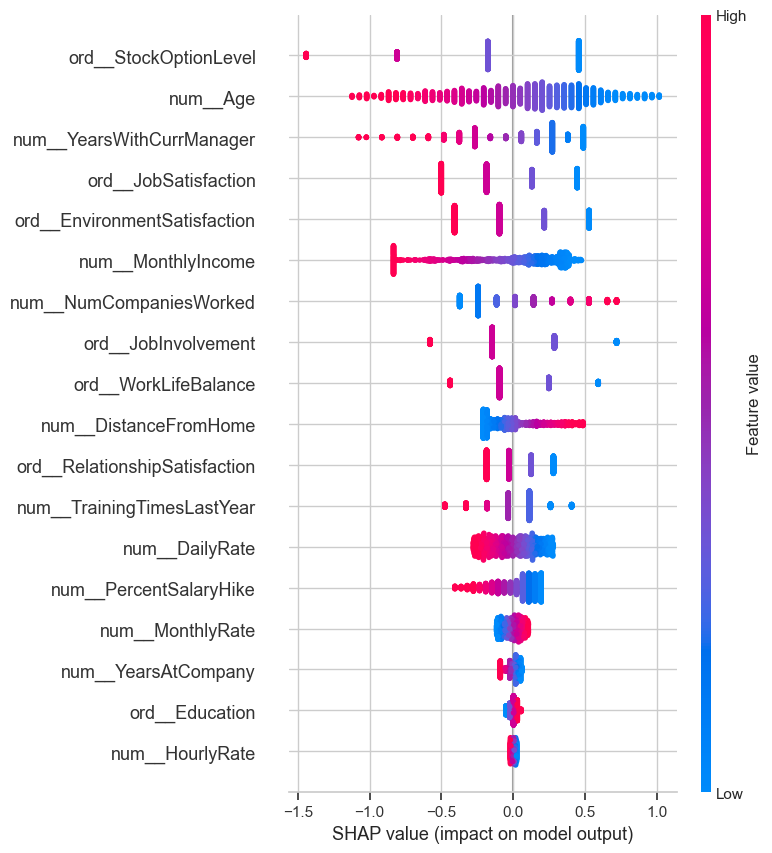

In [59]:

print(f" Explaining best model with SHAP: {best_model_name}")

# 1. Extract classifier and transform training data
classifier = best_model.named_steps['classifier']
X_transformed = preprocessor.transform(X_train)  # no need to fit again

# 2. Create SHAP explainer (automatically detects model type)
explainer = shap.Explainer(classifier, X_transformed)

# 3. Compute SHAP values
shap_values = explainer(X_transformed)

# 4. SHAP Summary Plot
shap.summary_plot(shap_values, X_transformed, feature_names=preprocessor.get_feature_names_out())


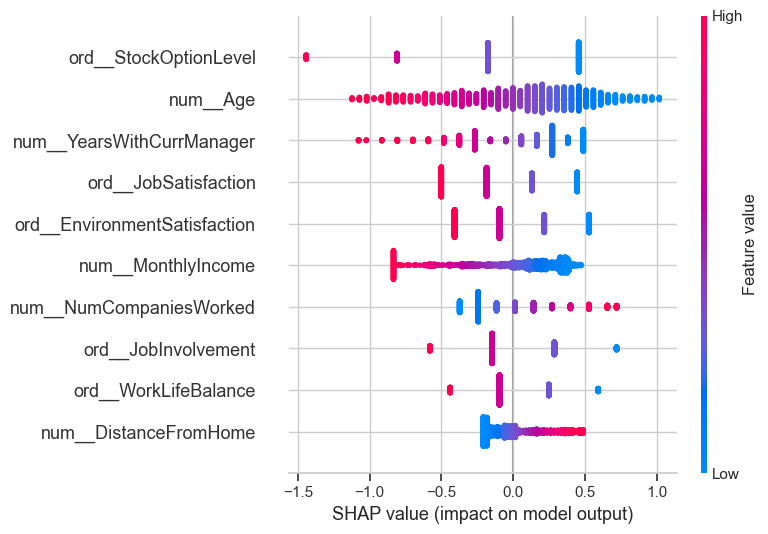

In [60]:

shap.summary_plot(shap_values, X_transformed, 
                  feature_names=preprocessor.get_feature_names_out(), 
                  max_display=10)


## 4.9 Actionable HR insights

In [61]:
#Insights from SHAP translated into actionable HR Strategies

print("Top Actionable Insights for HR (based on SHAP Analysis):")

print("\n1. Stock Options Matter:")
print("Employees with higher stock option levels are less likely to leave.")
print("Strategy: Offer or increase stock options to improve retention.")

print("\n2. Age and Experience Correlate with Retention:")
print("Older employees and those with more years with their current manager show lower attrition risk.")
print("Strategy: Retain experienced staff through mentorship roles or leadership paths.")

print("\n3. Job Satisfaction and Environment Satisfaction are Key:")
print("Higher satisfaction levels in job roles and work environment strongly reduce attrition.")
print("Strategy: Run regular employee satisfaction surveys and act on feedback.")

print("\n4. Monthly Income Helps Retain Talent:")
print("Employees with higher monthly income are less likely to leave.")
print("Strategy: Benchmark salaries to market rates and offer performance-based bonuses.")

print("\n5. Overworked Employees at Risk:")
print("High distance from home and high number of companies worked relate to higher attrition.")
print("Strategy: Support flexible hours, remote options, and reduce employee burnout.")

print("\n6. Career Development Matters:")
print("Training frequency and years at company also influence predictions.")
print("Strategy: Invest in continuous learning programs and transparent career progression plans.")

print("\n7. Work-Life Balance Still a Game Changer:")
print("Lower work-life balance ratings increase attrition likelihood.")
print("Strategy: Encourage boundaries, wellness programs, and time-off utilization.")


Top Actionable Insights for HR (based on SHAP Analysis):

1. Stock Options Matter:
Employees with higher stock option levels are less likely to leave.
Strategy: Offer or increase stock options to improve retention.

2. Age and Experience Correlate with Retention:
Older employees and those with more years with their current manager show lower attrition risk.
Strategy: Retain experienced staff through mentorship roles or leadership paths.

3. Job Satisfaction and Environment Satisfaction are Key:
Higher satisfaction levels in job roles and work environment strongly reduce attrition.
Strategy: Run regular employee satisfaction surveys and act on feedback.

4. Monthly Income Helps Retain Talent:
Employees with higher monthly income are less likely to leave.
Strategy: Benchmark salaries to market rates and offer performance-based bonuses.

5. Overworked Employees at Risk:
High distance from home and high number of companies worked relate to higher attrition.
Strategy: Support flexible hours